# Examining the distribution of arm numbers in the sample

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_spiral_arms = pd.read_pickle('lib/spiral_arms.pickle')
merged_arms = pd.read_pickle('lib/merged_arms.pickle')

## Comparison between main and validation spiral arm count

In [3]:
validation_indices = (
    pd.read_csv('lib/duplicate_galaxies.csv')
    .rename(columns={'0': 'main', '1': 'validation'})
)

Let's compare the number of spiral arms we recovered for each validation galaxy to its equivalent in the main run

In [4]:
arm_counts = pd.DataFrame([], columns=('main', 'validation'))
for _, row in validation_indices.iterrows():
    n_main = len(all_spiral_arms.loc[int(row.main)].drop('pipeline').dropna())
    n_validation = len(all_spiral_arms.loc[int(row.validation)].drop('pipeline').dropna())
    arm_counts.loc[int(row.main)] = dict(main=n_main, validation=n_validation)

We see that arm number is only identical for half of the galaxies, but generally the arm number is within one between the main and validation runs

In [5]:
exact = (
    arm_counts
    .eval('main == validation')
    .value_counts()
    .pipe(lambda df: df/df.sum())
    .rename('exact')
)
within_one = (
    arm_counts
    .eval('abs(main - validation) <= 1')
    .value_counts()
    .pipe(lambda df: df/df.sum())
    .rename('within_one')
)
(
    pd.concat((exact, within_one), axis=1)
    .style.format(lambda v: f'{v:.2%}')
)

,exact,within_one
True,53.06%,92.86%
False,46.94%,7.14%


Text(0, 0.5, 'Number of arms in main run result')

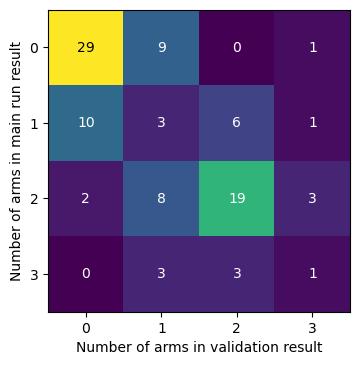

In [7]:
corr = arm_counts.groupby(['main', 'validation']).apply(len).astype(int).unstack().fillna(0)
plt.figure(dpi=100)
plt.imshow(corr.values)
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        color = "w" if corr.iat[i, j] < 20 else 'k'
        text = plt.text(j, i, int(corr.iat[i, j]),
                       ha="center", va="center", color=color)
plt.xticks(corr.index);
plt.yticks(corr.columns);
plt.xlabel('Number of arms in validation result')
plt.ylabel('Number of arms in main run result')

We can see a spike at 0 and 2, and as expected often differ by one arm.

## After merging main with validation results:

In [ ]:
unstacked_merged_arms = merged_arms.drop(columns=['pipeline']).unstack().dropna()
total_points = unstacked_merged_arms.apply(lambda arm: len(arm.R)).sum()
arm_number_distribution = (
    merged_arms
    .drop(columns=['pipeline'])
    .apply(lambda row: len(row.dropna()), axis=1)
    .value_counts()
    .sort_index()
    .rename('arm_count_frequency')
)

In [48]:
print('{:,} total galaxies, {:,} of which with identified spiral arms'.format(
    len(merged_arms), len(merged_arms.drop(columns=['pipeline']).dropna(how='all'))
))
print(f'{len(unstacked_merged_arms):,} total spiral arms')
print(f'{total_points:,} total points')
print('-'*70)
for k, v in arm_number_distribution.items():
    print(f'{v:< 4} galaxies had {k} arm(s)')

159 total galaxies, 129 of which with identified spiral arms
247 total spiral arms
238,433 total points
----------------------------------------------------------------------
 30  galaxies had 0 arm(s)
 38  galaxies had 1 arm(s)
 68  galaxies had 2 arm(s)
 19  galaxies had 3 arm(s)
 4   galaxies had 4 arm(s)
